In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading Dataset

marketing = pd.read_csv('bankmarketing.csv', sep=",",engine = 'python')
marketing.head()                  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
mar_df = marketing[[ 'job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]
mar_df.head()

mar_df_cat = mar_df[['age','duration','euribor3m']]
mar_df_cat.head()
mar_df_cat.describe()

,age,duration,euribor3m
count,41188.00000,41188.000000,41188.000000
mean,40.02406,258.285010,3.621291
std,10.42125,259.279249,1.734447
min,17.00000,0.000000,0.634000
25%,32.00000,102.000000,1.344000
50%,38.00000,180.000000,4.857000
75%,47.00000,319.000000,4.961000
max,98.00000,4918.000000,5.045000


In [20]:
mar_df_num = marketing[[ 'job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
mar_df_num.head()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
mar_df1 = mar_df_num.apply(le.fit_transform)
mar_df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [22]:
mar_df1 = pd.concat(objs = [mar_df1, mar_df_cat], axis = 1, ignore_index = False)
mar_df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,56,261,4.857
1,7,1,3,1,0,0,1,6,1,1,57,149,4.857
2,7,1,3,0,2,0,1,6,1,1,37,226,4.857
3,0,1,1,0,0,0,1,6,1,1,40,151,4.857
4,7,1,3,0,0,2,1,6,1,1,56,307,4.857


In [23]:
# standardizing data
columns_to_normalize     = ['age','duration','euribor3m']
mar_df1[columns_to_normalize] = mar_df1[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [24]:
mar_df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.71246
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.71246
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.71246
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.71246
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.71246


In [25]:
mar_df1_matrix = mar_df1.as_matrix()
mar_df1_matrix

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 3.        ,  1.        ,  0.        , ...,  1.53303429,
         0.01047142,  0.71245988],
       [ 7.        ,  1.        ,  3.        , ...,  1.62899323,
        -0.42150051,  0.71245988],
       [ 7.        ,  1.        ,  3.        , ..., -0.29018564,
        -0.12451981,  0.71245988],
       ...,
       [ 5.        ,  1.        ,  6.        , ...,  1.53303429,
        -0.26722482, -1.49518647],
       [ 9.        ,  1.        ,  5.        , ...,  0.38152696,
         0.70856893, -1.49518647],
       [ 5.        ,  1.        ,  5.        , ...,  3.26029527,
        -0.07438021, -1.49518647]])

In [29]:
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(mar_df1_matrix, categorical=[0,1,2,3,4,5,6,7,8,9])

In [30]:
kproto.cost_

129240.36443701205

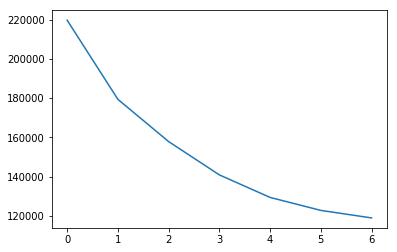

In [32]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(mar_df1_matrix, categorical=[0,1,2,3,4,5,6,7,8,9])
    cost.append(kproto.cost_)
    
plt.plot(cost)